# Project: Candy Data Cleaning

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present

### <font color = 'white'>First we import libraries and read the data:</font>

In [1]:
import pandas as pd,numpy as np,warnings,matplotlib.pyplot as plt, seaborn as sns
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',None)

%matplotlib inline

In [5]:
data = pd.read_excel('../Datasets/Candyhierarchy2017.xlsx')

In [6]:
data.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,Na

In [7]:
data.isna().sum()

Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                    41
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 120, dtype: int64

### <font color = 'white'>It has alot of missing values, we will treat each column in different way</font>

In [5]:
data['Q1: GOING OUT?'].unique()

array([nan, 'No', 'Yes'], dtype=object)

#### <font color = 'White'>Changing columns names to be easy to use.</font>

In [8]:
cols = list(data.columns)
def ff (cols):
    new = []
    for col in cols:
        col=col[col.find(':')+1:]
        col = col.strip()
        new.append(col)
    return new
data.columns=ff(cols)
data.columns

Index(['Internal ID', 'GOING OUT?', 'GENDER', 'AGE', 'COUNTRY',
       'STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'DESPAIR OTHER', 'OTHER COMMENTS', 'DRESS', '113', 'DAY',
       'MEDIA [Daily Dish]', 'MEDIA [Science]', 'MEDIA [ESPN]',
       'MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)

 - in the row level I notice that some responses has skipped all questions in the servey and submit it!, i will drop these records that will not benifit us.

In [9]:
print(data.shape)
data.dropna(axis=0,thresh=80,inplace=True)

(2460, 120)


In [10]:
data.isna().sum().sort_values(ascending=False)

113                              1732
MEDIA [Yahoo]                    1676
MEDIA [Daily Dish]               1659
MEDIA [ESPN]                     1643
OTHER COMMENTS                   1367
                                 ... 
Q6 | Kit Kat                        5
Q6 | Peanut M&M’s                   3
Q6 | Hershey's Dark Chocolate       1
Q6 | Hershey’s Milk Chocolate       1
Internal ID                         0
Length: 120, dtype: int64

In [12]:
print(data['GOING OUT?'].value_counts())
print(f"Missing Values is : {data['GOING OUT?'].isna().sum()}")

No     1448
Yes     233
Name: GOING OUT?, dtype: int64
Missing Values is : 60


In [13]:
df= data.replace(np.nan,'SKIPPED')

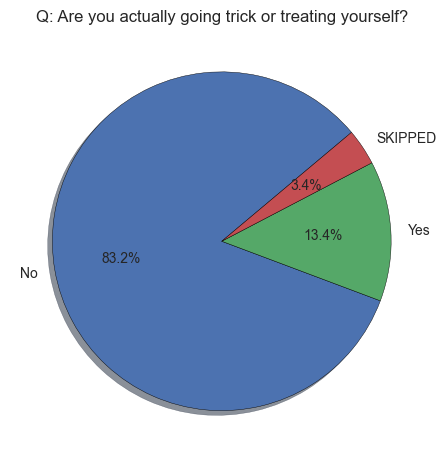

In [15]:
def pie(column_name):
    go = df[column_name].value_counts()
    goind = go.index
    plt.pie(go,labels=goind,wedgeprops={'edgecolor':'black'},
            shadow=True,
            startangle=40,
            autopct = '%1.1f%%')
    plt.style.use('seaborn')

pie('GOING OUT?')
plt.title('Q: Are you actually going trick or treating yourself?')
plt.show()

#### <font color ='white'>It seems like most answers going for **No**</font>

---

In [16]:
df['GENDER'].value_counts()

Male                  1042
Female                 607
I'd rather not say      58
Other                   26
SKIPPED                  8
Name: GENDER, dtype: int64

In [17]:
dd = df.query('GENDER != "Male" and GENDER != "Female"')
print("Unvalid Answers: "+str(len(dd)))
df.drop(dd.index,inplace=True)

Unvalid Answers: 92


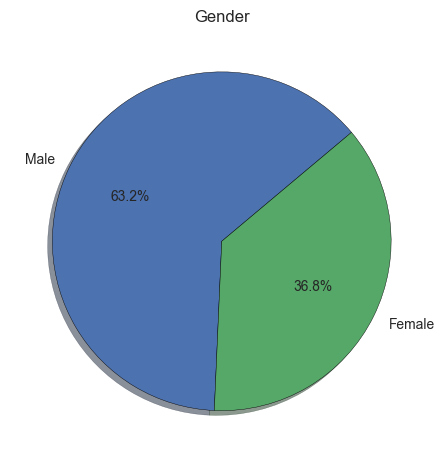

In [18]:
pie('GENDER')
plt.title('Gender')
plt.show()

---

In [20]:
df['AGE'].unique()

array([44, 40, 23, 'SKIPPED', 33, 53, 56, 64, 43, 37, 48, 49, 34, 35, 38,
       58, 50, 47, 52, 63, 65, 45, 41, 31, 59, 61, 46, 54, 62, 29, 42, 36,
       32, 28, 69, 67, 39, 30, 25, 22, 51, 70, 24, 27, 19, 'Old enough',
       57, 66, 12, 'Many', 60, 55, '?', 11, 'no', 68, 20, 21, 6, 10, 71,
       13, 26, '45-55', 72, 9, 74, 18, 'older than dirt', 15, 8, 75,
       'Enough', 7, 'Over 50', 90, 76, 16, 'ancient', 'OLD', 14,
       'MY NAME JEFF', 4, 73, 'old enough',
       'I can remember when Java was a cool new language'], dtype=object)

In [21]:
unvalidlist=set()
validlist = []
for i in df['AGE']:
    try:
        jj = int(i)
        validlist.append(i)
    except:
        unvalidlist.add(i.lower())
print(unvalidlist)
di = {}
# for un in unvalidlist:

{'45-55', 'ancient', 'enough', '?', 'many', 'old', 'skipped', 'old enough', 'older than dirt', 'over 50', 'i can remember when java was a cool new language', 'no', 'my name jeff'}


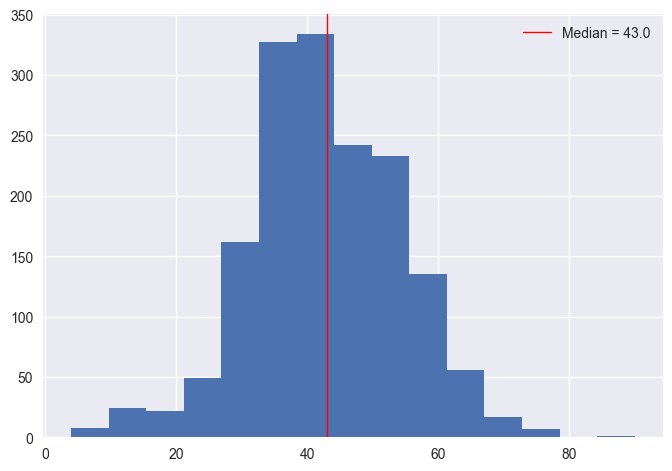

In [22]:
fig,ax = plt.subplots()
plt.hist(validlist,bins=15)
med = np.median(validlist)
ax.axvline(med, color='red', label=f"Median = {med}", linewidth=1)
plt.legend()
plt.show()

In [23]:
for i in unvalidlist:
    if 'old' in i or 'many' in i :
        di[i] = 43+10
    else:
        di[i] = int(med)
di['45-55']=50
print(di)

{'45-55': 50, 'ancient': 43, 'enough': 43, '?': 43, 'many': 53, 'old': 53, 'skipped': 43, 'old enough': 53, 'older than dirt': 53, 'over 50': 43, 'i can remember when java was a cool new language': 43, 'no': 43, 'my name jeff': 43}


In [24]:
df['AGE'] = df['AGE'].astype(str).apply(lambda x : x.lower()).replace(di)
df['AGE'] = pd.to_numeric(df['AGE'])

In [25]:
pd.DataFrame(df['AGE'].describe()).T

,count,mean,std,min,25%,50%,75%,max
AGE,1649.0,42.753184,11.399107,4.0,35.0,43.0,50.0,90.0


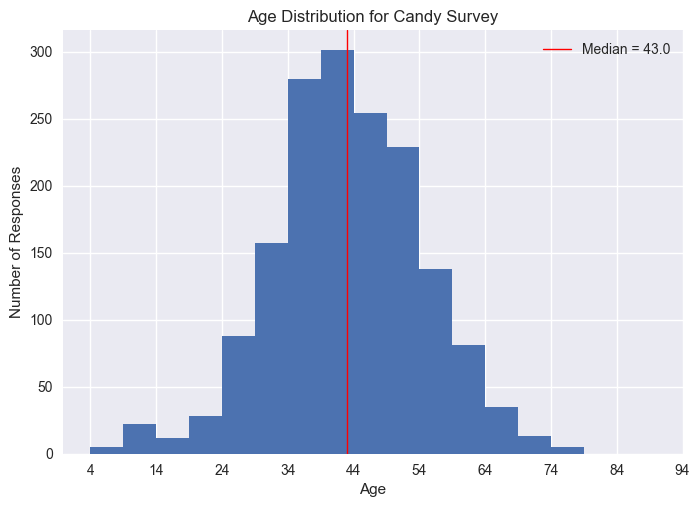

In [26]:
fig,ax = plt.subplots()
bi = [x for x in range(4,90,5)]
plt.hist(df['AGE'],bins=bi)
med = np.median(df['AGE'])
ax.axvline(med, color='red', label=f"Median = {med}", linewidth=1)
plt.legend()
plt.xticks([x for x in range(4,90+5,10)])
plt.title('Age Distribution for Candy Survey')
plt.ylabel('Number of Responses')
plt.xlabel('Age')
plt.style.use('fivethirtyeight')
plt.show()

#### <font color = 'White'>Age has a normal distribution!</font>
<br>

In [27]:
print(df['COUNTRY'].nunique())
df['COUNTRY'].unique()

87


array(['USA ', 'us', 'usa', 'SKIPPED', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'USA', 'United States', 'united states', 'Usa',
       'United staes', 'United Kingdom', 'United States of America',
       'UAE', 'United States ', 'canada ', 'United states', 'u.s.a.',
       'france', 'United States of America ', 'america', 'U.S.A.',
       'Mexico', 'Canada ', 'united states of america', 'US of A', 'UK',
       'North Carolina ', 'uk', 'Netherlands', 'Europe', 'U S', 'u.s.',
       'Costa Rica', 'The United States of America', 'Greece',
       'The United States', 'USA? Hard to tell anymore..', "'merica",
       'United State', 'France', 'U.S.', 'Can', 'Canae', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 'Australia', 'California',
       'Unites States', 'Japan', 'USa',
       'I pretend to be from Canada, but I am really from the United States.',
       'Usa ', 'Canada`', 'Scotland', 'Denmark', 'France ', 'Switzerland',
       'South Korea', 'New Jersey', 'CANADA',

In [29]:
df['COUNTRY'] = df['COUNTRY'].apply(lambda x : x.lower().strip())

from fuzzywuzzy import fuzz

def matching_usa(col):
    sett = ['usa','united states','america','us of america','us','u.s.a','u s a','usausa','new york','new jersey','california']
    for i in sett:
        if fuzz.token_set_ratio(i,col)>70:
            return 'united states'
        
    sett = ['england','uk','united kingdom']
    for i in sett:
        if fuzz.token_set_ratio(i,col)>70:
            return 'united kingdom'
    sett = ['canada','can']
    for i in sett:
        if fuzz.token_set_ratio(i,col)>70:
            return 'canada'
    return col
        
df['COUNTRY'] = df['COUNTRY'].apply(matching_usa)
nn = []
for i in df['COUNTRY']:
    if len(i)>len('united states '):
        nn.append(i)
print(nn)
df['COUNTRY'].replace(nn,'SKIPPED',inplace=True)

unv = ['earth','trumpistan','ahem....amerca','murrika']
df['COUNTRY'] = df['COUNTRY'].apply(lambda x : 'SKIPPED' if x in unv else x)
df['COUNTRY'].value_counts()

['subscribe to dm4uz3 on youtube', "i don't know anymore", 'fear and loathing']


united states     1435
canada             145
united kingdom      19
skipped              9
germany              5
SKIPPED              5
netherlands          4
japan                3
france               3
scotland             3
switzerland          2
denmark              2
mexico               2
korea                1
australia            1
north carolina       1
greece               1
costa rica           1
europe               1
south korea          1
uae                  1
taiwan               1
china                1
spain                1
narnia               1
Name: COUNTRY, dtype: int64

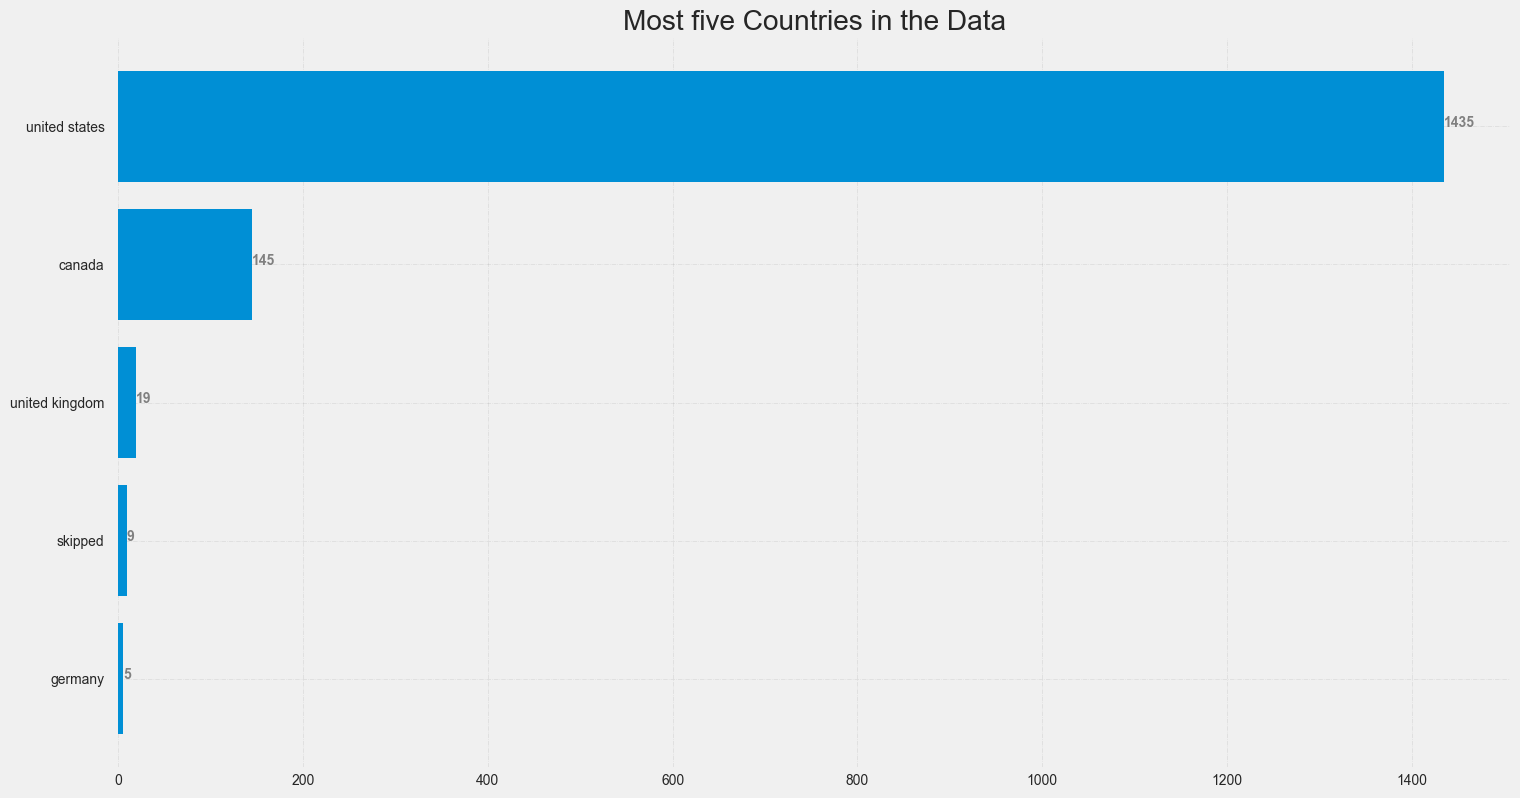

In [31]:
dd = df['COUNTRY'].value_counts(ascending = False)
# print(dd)
fig,ax=plt.subplots(figsize =(16, 9))
ax.barh(dd.index[:5],dd[:5])
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.4,
             str(round((i.get_width()), 2))+"",
             fontsize = 10, fontweight ='bold',
             color ='grey')

plt.title("Most five Countries in the Data")
plt.show()

### <font color ='white'>America is the most appeared country in the data then Canada</font>
<br>

---

In [32]:
df.rename(columns ={'STATE, PROVINCE, COUNTY, ETC':'STATE'},inplace=True)

In [33]:
print(df['STATE'].nunique())
df['STATE'].sort_values().unique()

396


array(['AB', 'AZ', 'Abu Dhabi', 'Alabama', 'Alaska',
       'Alaska, Matanuska-Susitna Borough', 'Alberta', 'Alberta ',
       'America', 'Arizona', 'Arizona ', 'Arkansas', 'Atlanta, GA', 'Az',
       'BC', 'BERKELEY, CA', 'Baja California', 'Bc', 'Bloomington, IN',
       'Bristol County, Rhode Island', 'British Columbia',
       'British Columbia ', 'Brooklyn', 'Buncombe County, North Carolina',
       'CA', 'CA, Alameda', 'CO', 'CO, Larimer County', 'COLORADO', 'CT',
       'Ca', 'Califor', 'California', 'California ',
       'California, Alameda',
       'California, Contra Costa County, Pleasant Hill',
       'California, Mendocino County', 'California, San Diego',
       'California, San Francisco', 'California, USA',
       'Carver county, MN', 'Chicago, IL', 'Chicago, Illinois', 'Co',
       'Colorado', 'Colorado ', 'Colorado larimer county',
       'Colorado, Jefferson county ', 'Connecticut', 'Connecticut ',
       'Cook', 'Cuyahoga County, Ohio', 'DC', 'DC ', 'Dc', 'Derbyshi

In [34]:
df['STATE'] = df['STATE'].apply(lambda x : x.lower().strip())
list_rep = ['city','state','county','ur mom','dona ana , ','usa','the shore','the democratic people\'s republic of','greater ','hi',
'skipped',' - but will be in wasngton for halloween','|']
for i in list_rep:
    df['STATE']=df['STATE'].str.replace(i,'')
df['STATE'] = df['STATE'].str.replace('new york , new york , new york','')
df['STATE']=df['STATE'].replace({'':'skipped','ca':'california','ny':'new york',
                                 'wa':'wasngton','ma':'massachusetts','fl':'florida','il':'illinois',
                                 'ill':'illinois','nj':'new jersey','co':'colorado','ga':'georgia',
                                 'nc':'north carolina','in':'indiana','tn':'tennessee','va':'virginia',
                                'tx':'texas'})

- The reference for states abbreviations<font color ='gray'> https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations</font>

In [36]:
df[df['COUNTRY']=='united states']['STATE'].value_counts()[:60]

california        207
wasngton           76
new york           73
illinois           69
texas              67
massachusetts      59
oregon             47
virginia           46
florida            34
oo                 34
pennsylvania       34
colorado           33
north carolina     31
georgia            29
pa                 25
mn                 24
new jersey         22
micgan             21
wisconsin          21
indiana            21
minnesota          19
or                 17
maine              16
missouri           15
maryland           14
arizona            13
skipped            13
tennessee          13
iowa               12
mi                 12
mo                 12
utah               11
kansas             10
md                  9
dc                  9
oh                  8
az                  8
connecticut         8
oklahoma            8
nm                  7
nh                  7
louisiana           7
kentucky            6
ri                  6
nevada              6
montana   

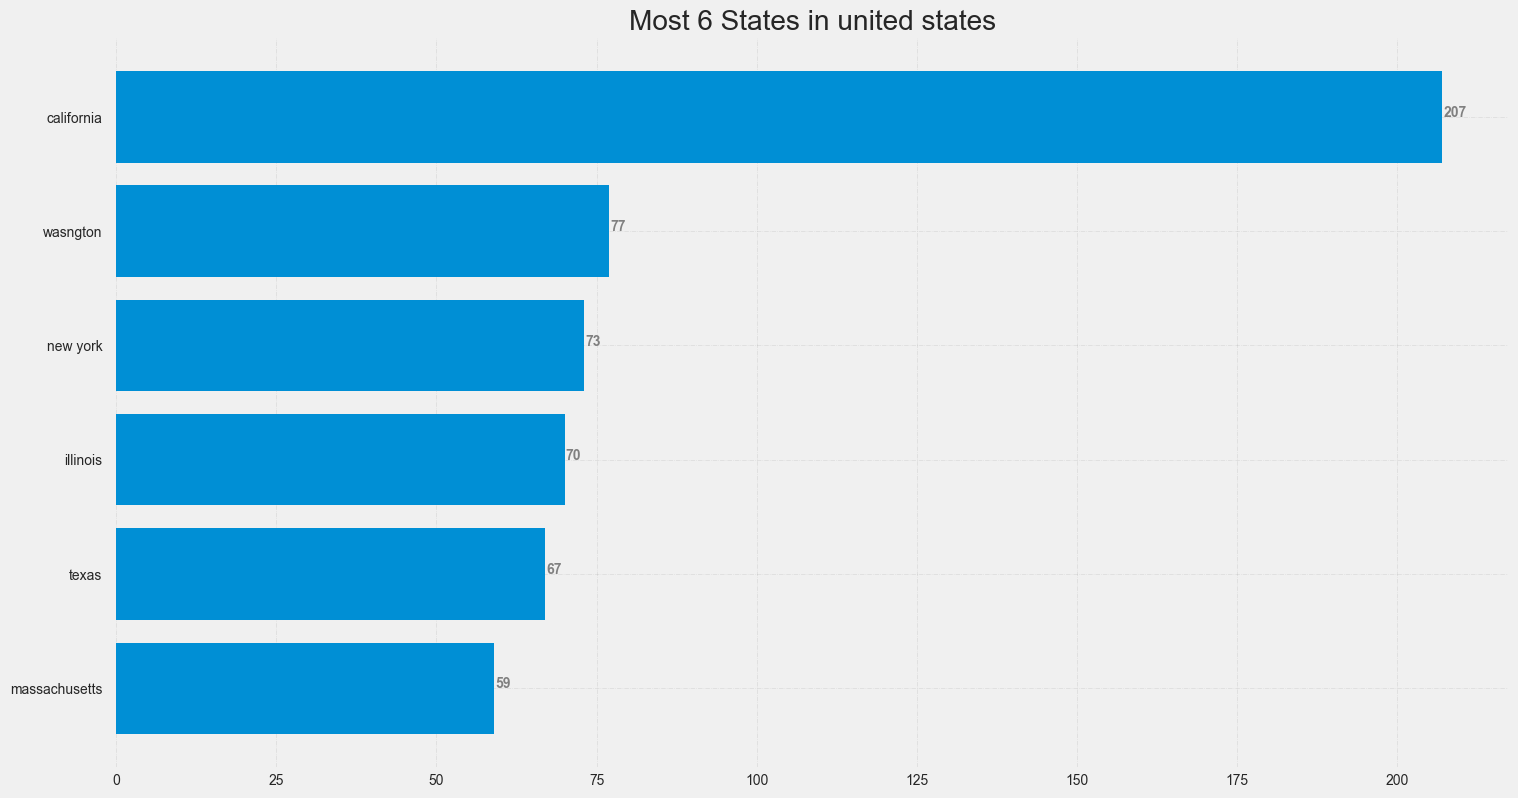

In [37]:
dd = df['STATE'].value_counts(ascending = False)
def barhh(data):
    dd = data
    fig,ax=plt.subplots(figsize =(16, 9))
    ax.barh(dd.index[:6],dd[:6])
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)
    ax.invert_yaxis()

    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.4,
                 str(round((i.get_width()), 2))+"",
                 fontsize = 10, fontweight ='bold',
                 color ='grey')
plt.style.use('fivethirtyeight')
barhh(dd)
plt.title("Most 6 States in united states")
plt.show()

#### <font color='white'> California is the most appeared state in USA</font>
<br>


In [38]:
df.iloc[:,6:-11].head()

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
4,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,M

In [41]:
the = df.iloc[:,6:-11]
candy,joy,Dis = [],[],[]
for i in the:
    candy.append(i[5:])
    joy.append(df[i].value_counts()['JOY'])
    Dis.append(df[i].value_counts()['DESPAIR'])

In [48]:
dd.head()

,col,joy,DES
8,Broken glow stick,23,1506
74,Real Housewives of Orange County Season 9 Blue...,84,1381
28,Gum from baseball cards,42,1364
100,White Bread,43,1356
42,Kale smoothie,92,1351


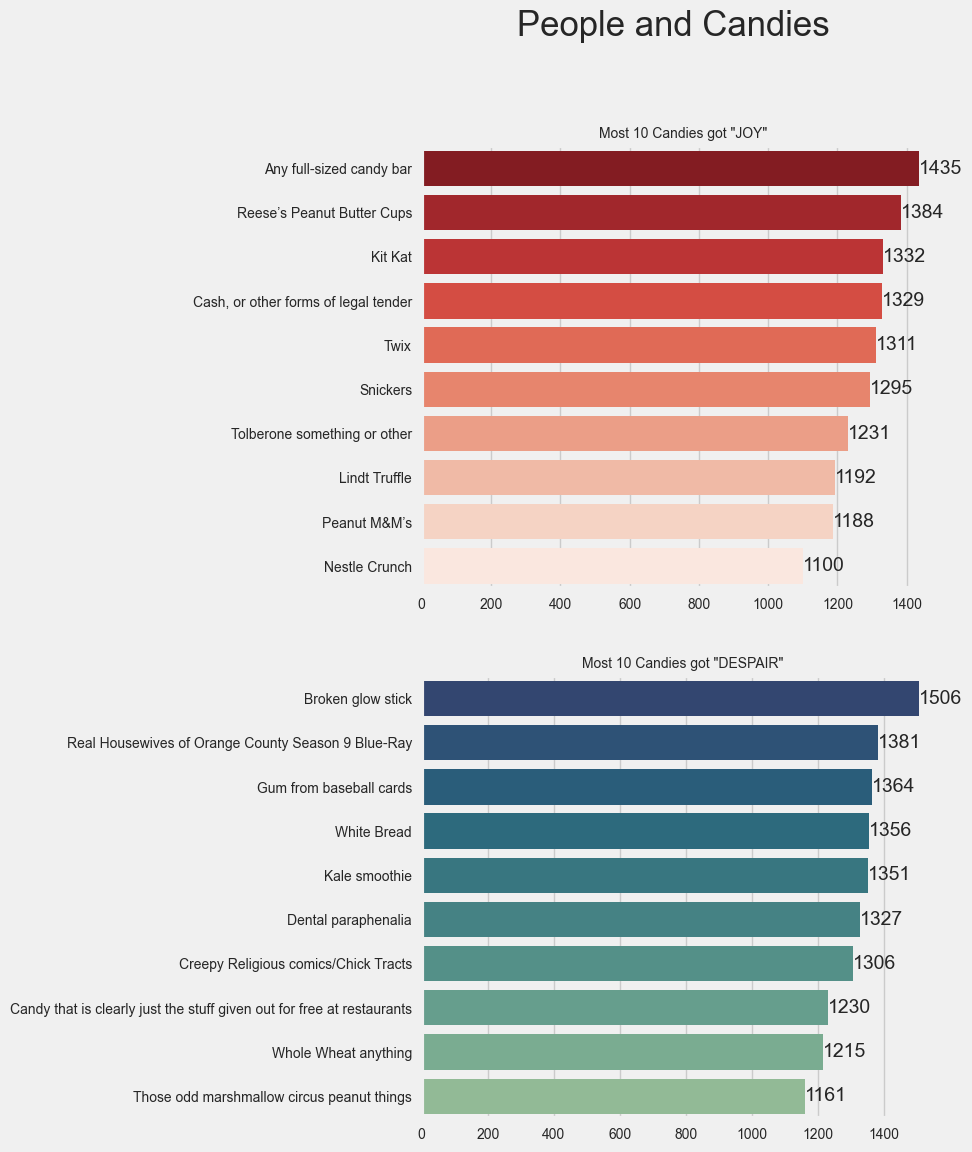

In [93]:
dd = pd.DataFrame()
dd['col'] = candy
dd['joy']=joy
dd['DES'] =Dis

fig,axes=plt.subplots(2,1,figsize=(6,12))

dd.sort_values(by='joy',ascending=False,inplace=True)
a= sns.barplot(ax = axes[0],y='col',x='joy',data=dd[:10],palette='Reds_r')
dd.sort_values(by='DES',ascending=False,inplace=True)
b = sns.barplot(ax = axes[1],y='col',x='DES',data=dd[:10],palette='crest_r')

axes[0].set_title('Most 10 Candies got "JOY"',size=10)
axes[0].set_xlabel("")
axes[0].set_ylabel("")

axes[1].set_title('Most 10 Candies got "DESPAIR"',size=10)
axes[1].set_xlabel("")
axes[1].set_ylabel("")



for i,j in zip(a.containers,b.containers):
    a.bar_label(i,)
    b.bar_label(j,)

 
fig.suptitle("People and Candies",size=25,ha='center')
plt.show()


In [97]:
df['DRESS'].value_counts()

White and gold    1000
Blue and black     581
SKIPPED             68
Name: DRESS, dtype: int64

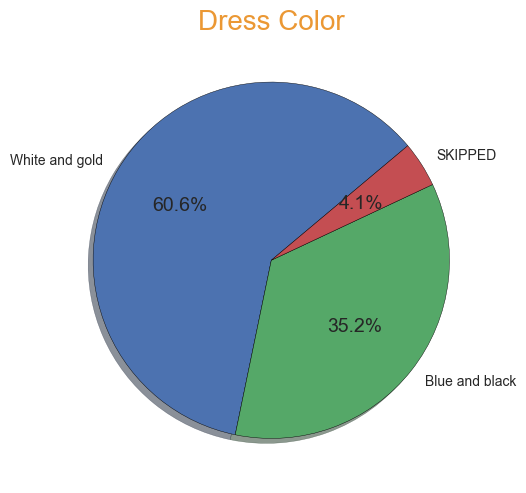

In [110]:
pie('DRESS')
plt.title("Dress Color",size=20,c='#eb9834')
plt.show()

### <font color ='white'> Most People when they first seen that dress, was gold.</font>

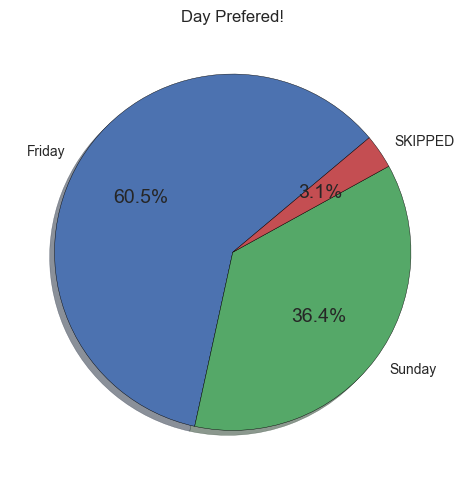

In [111]:
pie('DAY')
plt.title("Day Prefered!")
plt.show()

In [119]:
df.drop(columns=['113'],inplace=True)

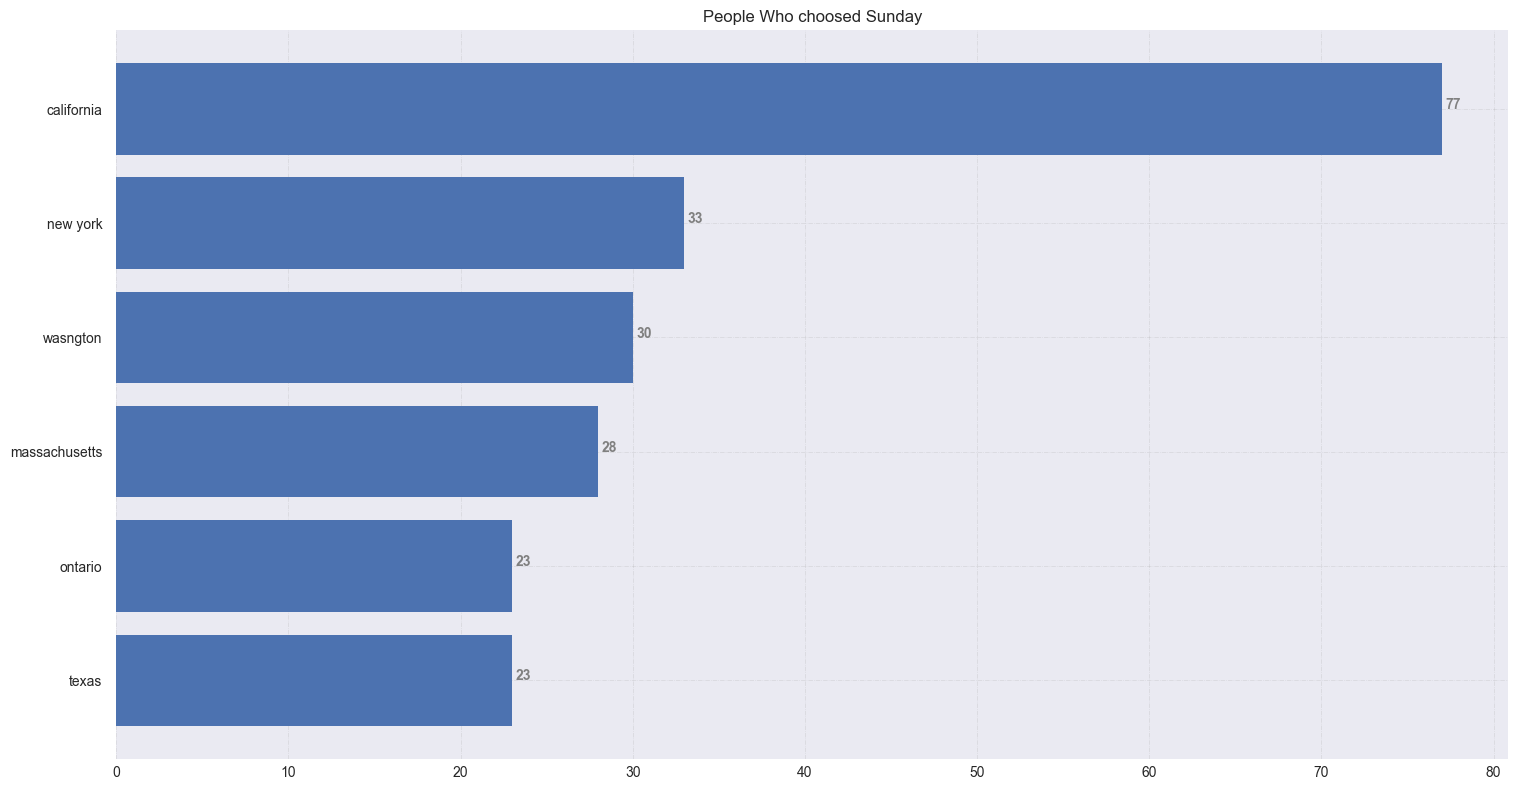

In [112]:
dadd = df.query('DAY == "Sunday"')
dd = dadd['STATE'].value_counts(ascending = False)
# print(dd)
fig,ax=plt.subplots(figsize =(16, 9))
ax.barh(dd.index[:6],dd[:6])
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.4,
             str(round((i.get_width()), 2))+"",
             fontsize = 10, fontweight ='bold',
             color ='grey')

plt.title("People Who choosed Sunday")
plt.show()



In [113]:
df.iloc[:,-5:-1] = df.iloc[:,-5:-1].apply(lambda x: x.apply(lambda y: 0 if y == 'SKIPPED' else y))

In [114]:
df['MEDIA [Science]'].value_counts()

1.0    1250
0.0     399
Name: MEDIA [Science], dtype: int64

In [115]:
a=[60,80,96,1250]
labell = ['Yahoo','Daily Dish','ESPN','Science']
a

[60, 80, 96, 1250]

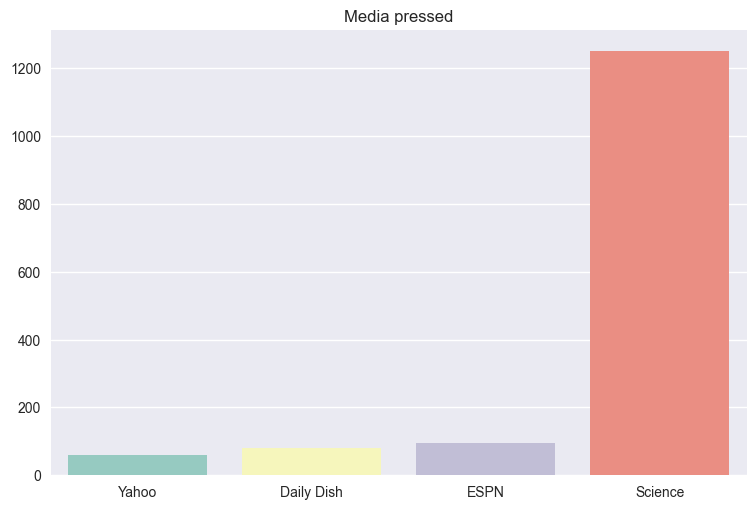

In [117]:
ax = sns.barplot(x=labell,y=a,palette='Set3')
plt.title('Media pressed')
plt.show()

#### <font color='white'>Most people here like to ckick out science content</font>

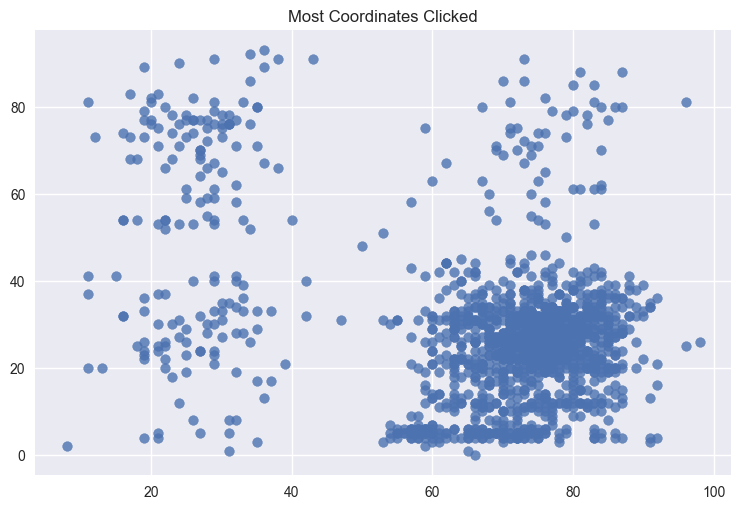

In [118]:
click = df['Click Coordinates (x, y)'].str.replace('[(),]','').str.strip()
x,y=[],[]
for i in click:
    try:
        x.append(int(i[0:2]))
        y.append(int(i[3:5]))
    except:
        continue
        
plt.scatter(x=x,y=y,alpha=0.8)
plt.title('Most Coordinates Clicked')
plt.show()